In [1]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

# Sensitivity
---

## Definition

Let us consider a function $f: \mathbb{N}^{|\mathcal{X}|} \to \mathbb{R}^d$. The $\mathcal{l}_p$-sensitivity of the function, denoted by $\Delta f$, is defined as the largest the function output can change by changing the function argument with a *neighboring* one.

$$ \Delta f = \max_{d(X,X') = 1} \|f(X) - f(X')\|_p,$$

where, $\|\cdot\|_p$ denotes the $p$-norm and $d(\cdot,\cdot)$ denotes the Hamming distance between two input arguments (typically databases). In other words, the sensitivity of a function gives an upper bound on how much we must perturb its output to preserve privacy [DR14].

### Sensitivities of some commonly used functions

- Mean, variance, histogram

| Functions $(f)$| $l_1$-sensitivity $\Delta_1(f)$ | $l_2$-sensitivity $\Delta_2(f)$ |
| -------------- |:-------------------------------:|:-------------------------------:|
| Mean           | $\frac{1}{n}$                   | $\frac{1}{n}$                   |
| Variance       | $\frac{1}{n}(1-\frac{1}{n})$    | $\frac{1}{n}(1-\frac{1}{n})$    |
| Histogram      | 1                               | 1                               |

- SVM, LR

| Functions $(f)$| output perturbation $\Delta_2(f)$ | objective perturbation $\Delta_2(f)$ |
| -------------- |:---------------------------------:|:------------------------------------:|
| SVM            | $n\frac{\lambda}{2}$              | $n\frac{\lambda}{2}$                 |
| LR             | $n\frac{\lambda}{2}$              | $n\frac{\lambda}{2}$                 |


In [2]:
"""
    --function--               --delta_f1--                 --detla_f2--          
    1. Mean                        1/n                          1/n                         # choose the number of samples n
    2. Variance              (1.0/n)*(1.0 - 1.0/n)         (1.0/n)*(1.0 - 1.0/n)            # choose the number of samples n        
    3. Histogram                   1.0                          1.0        
    
    **for (epsilon, delta = 0)** delta_f2
        show plot for: 2*(del_f/epsilon)^2 vs epsilon
    
    **for (epsilon, delta)** delta_f2
        show plot for: (del_f/epsilon*sqrt(2*ln(1.25/delta)))^2 vs epsilon
        
    
    --funciton--          --output perturbation--          --objective perturbation--
    4. SVM                     n*lambda/2.0                     --     
    5. LR                      n*lambda/2.0                     --     
    
    ** for output perturbation **
        show plot for: 1.0/beta vs epsilon,
            where beta = (n*lambda*epsilon)/2.0
    
    ** for objective perturbation **
        show plot for: 1.0/beta' vs epsilon,
            where beta' = epsilon'/2.0, 
                epsilon' = epsilon - ln(1.0 + 2.0/(n*lambda) + c^2/(n^2*lambda^2)),
                    c = 1.0/(2.0*h), and let h = 0.5
    
    
    --function--          --L1 sensitivity--                --L2 sensitivity-- 
    6. PCA                      1.0/n                              1.0/n    
    
    ** for (epsilon, delta = 0) **
        show plot for: 1.0/(n*epsilon) vs epsilon
    
    ** for (epsilon, delta) **
        show plot for: 1.0/(n*epsilon)*sqrt(2*ln(1.25/delta)) vs epsilon
    
"""

# These functions will be used to make the plots for funcitons (1) - (3)
# eps_ --> (epsilon, delta = 0)
# eps_del_ --> (epsilon, delta)
import numpy as np
import math

# parameters to test with the functions
samp_n = np.asarray([1000, 5000, 10000])
epsilon_vals = np.asarray([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10])
delta_vals = [0.01, 0.1, 0.5]
lambda_ = 0.1
h_ = 0.5

# These functions will be used to evaluate the noise variance of functions (1) - (3)
# and make the specified plots
# L1 sensitivity (epsilon, delta = 0)
def eps_(delF, epsilon):
    return(2.0*((delF/epsilon)**2))

vec_eps_ = np.vectorize(eps_)

# L2 sensitivity (epsilon, delta)
def eps_del_(delF, epsilon, delta):
    return((delF/epsilon*math.sqrt(2.0*np.log(1.25/delta)))**2)

vec_eps_del_ = np.vectorize(eps_del_)

# These functions will be used to make the plots for funciton (4) and (5)
# output perturbation
def output_pert(n, lambda_, epsilon):
    beta = (n*lambda_*epsilon) / 2.0
    return(1.0 / beta)

vec_output_pert_ = np.vectorize(output_pert)

# objective perturbation
def objective_pert(n, lambda_, epsilon, h):
    c = 1.0 / (2.0 * h)
    e_prime = epsilon - np.log(1.0 + 2.0/(n*lambda_) + (c**2)/((n**2)*(lambda_**2)))
    beta = e_prime / 2.0
    return (1.0 / beta)

vec_objec_pert_ = np.vectorize(objective_pert)

# These functions will be used for function (6) the PCA sensitivity
# L1 sensitivity
def pca_L1_sens(n, epsilon):
    return 1.0 / (n * epsilon)

vec_pca_L1 = np.vectorize(pca_L1_sens)

# L2 sensitivity
def pca_L2_sens(n, epsilon, delta):
    return((1.0/(n*epsilon))*math.sqrt(2.0*np.log(1.25/delta)))

vec_pca_L2 = np.vectorize(pca_L2_sens)

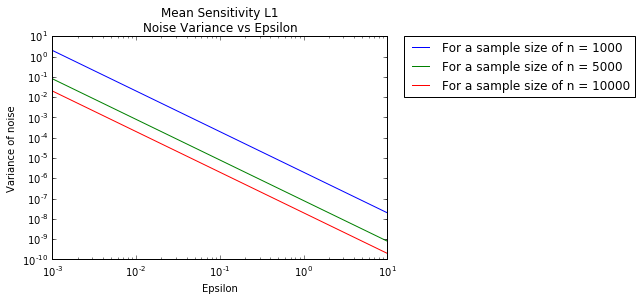

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# The following plots will be for the mean function L1 sensitivity (epsilon, delta = 0)
# delta_f1 and delta_f2 function for the **mean** function

def mean_delF(n):
    return(1.0/n)

# sample size n = 1000
text_out0 = "For a sample size of n = {}".format(samp_n[0])
L1_mean = mean_delF(samp_n[0])
y_10 = vec_eps_(L1_mean, epsilon_vals)

# sample size n = 5000
text_out1 = "For a sample size of n = {}".format(samp_n[1])
L1_mean = mean_delF(samp_n[1])
y_11 = vec_eps_(L1_mean, epsilon_vals)

# sample size n = 10000
text_out2 = "For a sample size of n = {}".format(samp_n[2])
L1_mean = mean_delF(samp_n[2])
y_12 = vec_eps_(L1_mean, epsilon_vals)
    
# output the graphs for the different sample sizes
plt.plot(epsilon_vals, y_10, epsilon_vals, y_11, epsilon_vals, y_12, linewidth = 1)
plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Variance of noise")
plt.yscale('log')
plt.title("Mean Sensitivity L1\nNoise Variance vs Epsilon")
plt.legend((text_out0, text_out1, text_out2), bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0.)
plt.show()

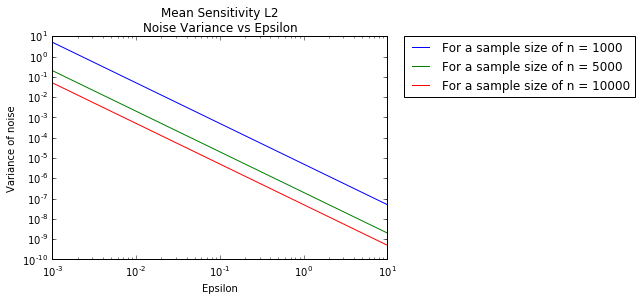

In [4]:
# The following plots will be for the mean funciton L2 sensitivity
# continuing with the mean function, we will work with the eps_del_ function (epsilon, delta)
# using the same sample and epsilon parameters from above

# sample size n = 1000
text_out0 = "For a sample size of n = {}".format(samp_n[0])
L2_mean = mean_delF(samp_n[0])
y_10d = vec_eps_del_(L2_mean, epsilon_vals, 0.1)

# sample size n = 5000
text_out1 = "For a sample size of n = {}".format(samp_n[1])
L2_mean = mean_delF(samp_n[1])
y_11d = vec_eps_del_(L2_mean, epsilon_vals, 0.1)

# sample size n = 10000
text_out2 = "For a sample size of n = {}".format(samp_n[2])
L2_mean = mean_delF(samp_n[2])
y_12d = vec_eps_del_(L2_mean, epsilon_vals, 0.1)
    
# output the graph for sample size n = 1000
plt.plot(epsilon_vals, y_10d, epsilon_vals, y_11d, epsilon_vals, y_12d, linewidth = 1)
plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Variance of noise")
plt.yscale('log')
plt.title("Mean Sensitivity L2\nNoise Variance vs Epsilon")
plt.legend((text_out0, text_out1, text_out2), bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0.)
plt.show()

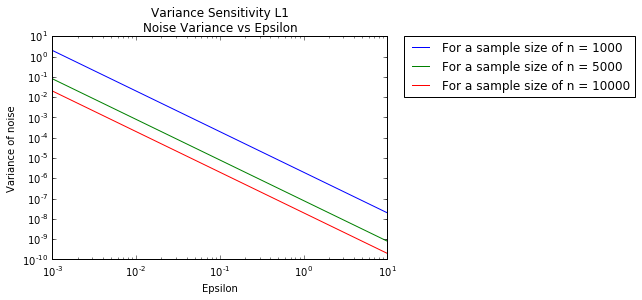

In [5]:
# The following plots will be for the variance funciton sensitivity L1 (epsilon, delta = 0)
# first define a method for the delta1 and delta2 of variance
import numpy as np

def var_delta(n):
    return((1.0/n)*(1.0 - 1.0/n))

# sample size n = 1000
text_out0 = "For a sample size of n = {}".format(samp_n[0])
L1_var = var_delta(samp_n[0])
y_20 = vec_eps_(L1_var, epsilon_vals)

# sample size n = 5000
text_out1 = "For a sample size of n = {}".format(samp_n[1])
L1_var = var_delta(samp_n[1])
y_21 = vec_eps_(L1_var, epsilon_vals)

# sample size n = 10000
text_out2 = "For a sample size of n = {}".format(samp_n[2])
L1_var = var_delta(samp_n[2])
y_22 = vec_eps_(L1_var, epsilon_vals)
    
# output the graphs for the different sample sizes
plt.plot(epsilon_vals, y_20, epsilon_vals, y_21, epsilon_vals, y_22, linewidth = 1)
plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Variance of noise")
plt.yscale('log')
plt.title("Variance Sensitivity L1\nNoise Variance vs Epsilon")
plt.legend((text_out0, text_out1, text_out2), bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0.)
plt.show()

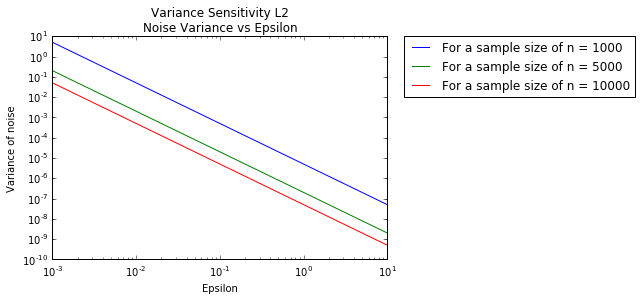

In [6]:
# The following plots will be for the variance funciton sensitivity L2 (epsilon, delta)
import numpy as np
delta = 0.1

# sample size n = 1000
text_out0 = "For a sample size of n = {}".format(samp_n[0])
L2_var = var_delta(samp_n[0])
y_20d = vec_eps_del_(L2_var, epsilon_vals, delta)

# sample size n = 5000
text_out1 = "For a sample size of n = {}".format(samp_n[1])
L2_var = var_delta(samp_n[1])
y_21d = vec_eps_del_(L2_var, epsilon_vals, delta)

# sample size n = 10000
text_out2 = "For a sample size of n = {}".format(samp_n[2])
L2_var = var_delta(samp_n[2])
y_22d = vec_eps_del_(L2_var, epsilon_vals, delta)
    
# output the graphs for the different sample sizes
plt.plot(epsilon_vals, y_20d, epsilon_vals, y_21d, epsilon_vals, y_22d, linewidth = 1)
plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Variance of noise")
plt.yscale('log')
plt.title("Variance Sensitivity L2\nNoise Variance vs Epsilon")
plt.legend((text_out0, text_out1, text_out2), bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0.)
plt.show()

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# The following funciton is an interactive method for the variance funciton L2 sensitivity (epsilon, delta)
# the user will be prompted for the sample size and \delta parameters to use
# and output the respective graph.

def var_eps_delt_():
    # first get the sample size n
    is_valid = False
    while not is_valid:
        txt_out = "Enter a positive integer to represent the sample size you intend to test with: "
        try: 
            n_size = input(txt_out)
            n_size = int(n_size)
        except ValueError:
            print("You entered an invalid type. Please try again.")
        except TypeError:
            print("You entered an invalid type. Please try again.")
        else:
            if n_size > 0:
                is_valid = True
            else:
                print("You entered an invalid value. Please enter a positive integer value.")
    print("\nYou entered a value of {} for the sample size.\n".format(n_size))
    
    
    # Now get the delta value to use
    is_valid = False
    while not is_valid:
        txt_out = "Enter a value from the interval (0, 1] to represent the privacy parameter \delta you intend to test with: "
        try: 
            delta = input(txt_out)
            delta = float(delta)
        except ValueError:
            print("You entered an invalid type. Please try again.")
        except TypeError:
            print("You entered an invalid type. Please try again.")
        else:
            if n_size > 0:
                is_valid = True
            else:
                print("You entered an invalid value. Please enter a real value from the interval (0, 1].")
    print("You entered a value of {} for the privacy parameter \delta.\n".format(delta))
    
    
    # Finally use the parameters obtained to output a plot of --- vs \epsilon
    epsilon_vals = np.asarray([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10])
    L2_var = var_delta(n_size)
    y_22d = vec_eps_del_(L2_var, epsilon_vals, delta)
    print("The following epsilon values were run with the sample size and \delta parameters chosen.")
    
    print("(epsilon, noise variance):\n")
    for i in range(len(epsilon_vals)):
        print("({:.2e}, {:.2e})".format(epsilon_vals[i], y_22d[i]))
    
    # output the graph for the chosen sample size
    plt.plot(epsilon_vals, y_22d, 'ro')
    plt.xlabel("Epsilon")
    plt.xscale('log')
    plt.ylabel("Variance of noise")
    plt.yscale('log')
    plt.title("Variance Sensitivity L2\nNoise Variance vs Epsilon")
    text_out = 'Sample size n = {:d}'.format(n_size)
    plt.text((epsilon_vals[4] + epsilon_vals[5]) / 2, y_22d[4],text_out)
    plt.show()

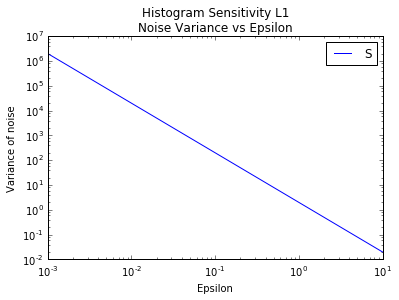

In [8]:
# The following plots will be used for the histogram function sensitivity
# the histogram sensitivity is independent of the sample size n

# This first plot is for the L1 sensitivity, (epsilon, delta = 0)
y_3 = vec_eps_(1.0, epsilon_vals)

# output the graph
plt.plot(epsilon_vals, y_3, linewidth = 1.0)
plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Variance of noise")
plt.yscale('log')
plt.title("Histogram Sensitivity L1\nNoise Variance vs Epsilon")
plt.legend(("Sensitivity"), loc = 0)
plt.show()


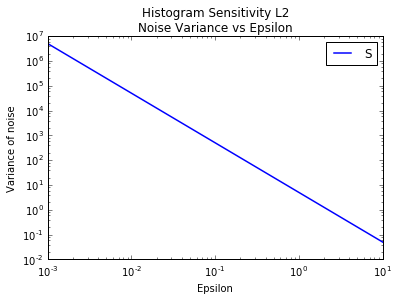

In [9]:
# This next plot is for the L2 sensitivity, (epsilon, delta)
y_3d = vec_eps_del_(1.0, epsilon_vals, 0.1)

# output the graph
plt.plot(epsilon_vals, y_3d, linewidth = 1.5)
plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Variance of noise")
plt.yscale('log')
plt.title("Histogram Sensitivity L2\nNoise Variance vs Epsilon")
plt.legend(("Sensitivity"), loc = 0)
plt.show()


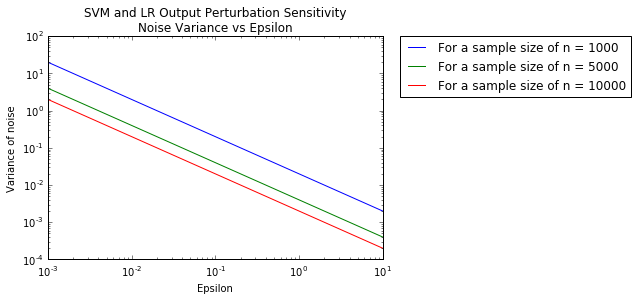

In [10]:
# The following plots will be used for the output perturbation function sensitivity

# The graphs to follow are equivalent for both SVM and LR

# output_pert(n, lambda_, epsilon)
# sample size n = 1000
text_out0 = "For a sample size of n = {}".format(samp_n[0])
lmda = 0.1
y_out_0 = vec_output_pert_(samp_n[0], lmda, epsilon_vals)

# sample size n = 5000
text_out1 = "For a sample size of n = {}".format(samp_n[1])
y_out_1 = vec_output_pert_(samp_n[1], lmda, epsilon_vals)

# sample size n = 10000
text_out2 = "For a sample size of n = {}".format(samp_n[2])
y_out_2 = vec_output_pert_(samp_n[2], lmda, epsilon_vals)

# output the graphs for the different sample sizes
plt.plot(epsilon_vals, y_out_0, epsilon_vals, y_out_1, epsilon_vals, y_out_2, linewidth = 1)
plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Variance of noise")
plt.yscale('log')
plt.title("SVM and LR Output Perturbation Sensitivity\nNoise Variance vs Epsilon")
plt.legend((text_out0, text_out1, text_out2), bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0.)
plt.show()

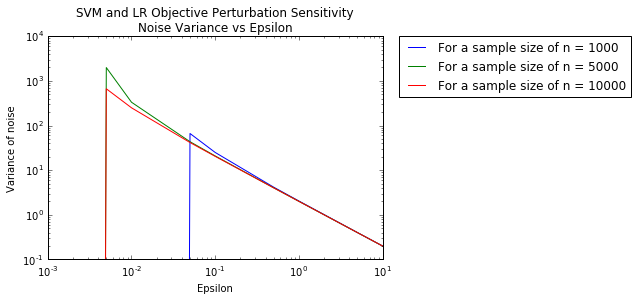

In [11]:
# These next plots are for the objective perturbation sensitivity

# objective_pert(n, lambda_, epsilon, h)

# sample size n = 1000
text_out0 = "For a sample size of n = {}".format(samp_n[0])
lmda = 0.1
y_obj_0 = vec_objec_pert_(samp_n[0], lmda, epsilon_vals, 0.5)

# sample size n = 5000
text_out1 = "For a sample size of n = {}".format(samp_n[1])
y_obj_1 = vec_objec_pert_(samp_n[1], lmda, epsilon_vals, 0.5)

# sample size n = 10000
text_2 = "For a sample size of n = {}".format(samp_n[2])
y_obj_2 = vec_objec_pert_(samp_n[2], lmda, epsilon_vals, 0.5)

# output the graphs for the different sample sizes
plt.plot(epsilon_vals, y_obj_0, epsilon_vals, y_obj_1, epsilon_vals, y_obj_2, linewidth = 1)
plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Variance of noise")
plt.yscale('log')
plt.title("SVM and LR Objective Perturbation Sensitivity\nNoise Variance vs Epsilon")
plt.legend((text_out0, text_out1, text_out2), bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0.)
plt.show()

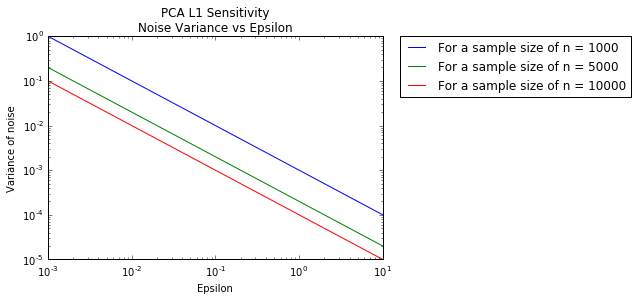

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# The following plots will be used for the PCA function sensitivity
# PCA L1 sensitivity (epsilon, delta = 0)

# sample size n = 1000
text_out0 = "For a sample size of n = {}".format(samp_n[0])
y_pca_10 = vec_pca_L1(samp_n[0],epsilon_vals)

# sample size n = 5000
text_out1 = "For a sample size of n = {}".format(samp_n[1])
y_pca_11 = vec_pca_L1(samp_n[1],epsilon_vals)

# sample size n = 10000
text_out2 = "For a sample size of n = {}".format(samp_n[2])
y_pca_12 = vec_pca_L1(samp_n[2],epsilon_vals)

# output the graphs for the different sample sizes
plt.plot(epsilon_vals, y_pca_10, epsilon_vals, y_pca_11, epsilon_vals, y_pca_12, linewidth = 1)
plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Variance of noise")
plt.yscale('log')
plt.title("PCA L1 Sensitivity\nNoise Variance vs Epsilon")
plt.legend((text_out0, text_out1, text_out2), bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0.)
plt.show()

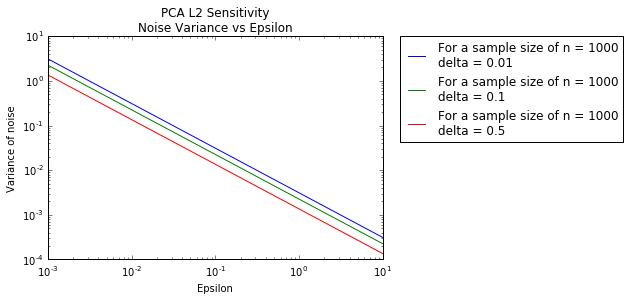

In [13]:
# PCA L2 sensitivity (epsilon, delta)
# sample size n = 1000 and cycle through the delta values
# sample size n = 1000, delta = 0.01
text_out0 = "For a sample size of n = {}\ndelta = {}".format(samp_n[0], delta_vals[0])
y_pca_201 = vec_pca_L2(samp_n[0], epsilon_vals, delta_vals[0])

# sample size n = 1000, delta = 0.1
text_out1 = "For a sample size of n = {}\ndelta = {}".format(samp_n[0], delta_vals[1])
y_pca_202 = vec_pca_L2(samp_n[0], epsilon_vals, delta_vals[1])

# sample size n = 1000, delta = 0.5
text_out2 = "For a sample size of n = {}\ndelta = {}".format(samp_n[0], delta_vals[2])
y_pca_203 = vec_pca_L2(samp_n[0], epsilon_vals, delta_vals[2])

# output the graphs for the different sample sizes
plt.plot(epsilon_vals, y_pca_201, epsilon_vals, y_pca_202, epsilon_vals, y_pca_203, linewidth = 1)
plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Variance of noise")
plt.yscale('log')
plt.title("PCA L2 Sensitivity\nNoise Variance vs Epsilon")
plt.legend((text_out0, text_out1, text_out2), bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0.)
plt.show()

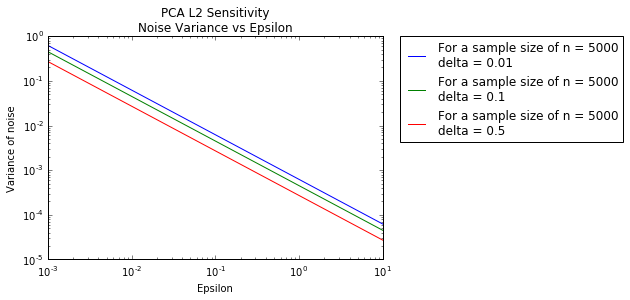

In [14]:
# PCA L2 sensitivity (epsilon, delta)
# sample size n = 5000 and cycle through the delta values
# sample size n = 5000, delta = 0.01
text_out0 = "For a sample size of n = {}\ndelta = {}".format(samp_n[1], delta_vals[0])
y_pca_211 = vec_pca_L2(samp_n[1], epsilon_vals, delta_vals[0])

# sample size n = 5000, delta = 0.1
text_out1 = "For a sample size of n = {}\ndelta = {}".format(samp_n[1], delta_vals[1])
y_pca_212 = vec_pca_L2(samp_n[1], epsilon_vals, delta_vals[1])

# sample size n = 5000, delta = 0.5
text_out2 = "For a sample size of n = {}\ndelta = {}".format(samp_n[1], delta_vals[2])
y_pca_213 = vec_pca_L2(samp_n[1], epsilon_vals, delta_vals[2])

# output the graphs for the different sample sizes
plt.plot(epsilon_vals, y_pca_211, epsilon_vals, y_pca_212, epsilon_vals, y_pca_213, linewidth = 1)
plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Variance of noise")
plt.yscale('log')
plt.title("PCA L2 Sensitivity\nNoise Variance vs Epsilon")
plt.legend((text_out0, text_out1, text_out2), bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0.)
plt.show()

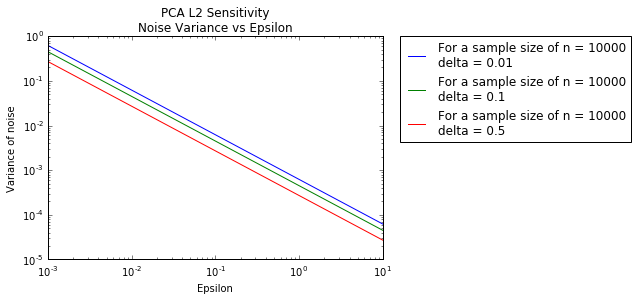

In [15]:
# PCA L2 sensitivity (epsilon, delta)
# sample size n = 10000 and cycle through the delta values
# sample size n = 10000, delta = 0.01
text_out0 = "For a sample size of n = {}\ndelta = {}".format(samp_n[2], delta_vals[0])
y_pca_221 = vec_pca_L2(samp_n[2], epsilon_vals, delta_vals[0])

# sample size n = 10000, delta = 0.1
text_out1 = "For a sample size of n = {}\ndelta = {}".format(samp_n[2], delta_vals[1])
y_pca_222 = vec_pca_L2(samp_n[2], epsilon_vals, delta_vals[2])

# sample size n = 10000, delta = 0.5
text_out2 = "For a sample size of n = {}\ndelta = {}".format(samp_n[2], delta_vals[2])
y_pca_223 = vec_pca_L2(samp_n[2], epsilon_vals, delta_vals[2])

# output the graphs for the different sample sizes
plt.plot(epsilon_vals, y_pca_211, epsilon_vals, y_pca_212, epsilon_vals, y_pca_213, linewidth = 1)
plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Variance of noise")
plt.yscale('log')
plt.title("PCA L2 Sensitivity\nNoise Variance vs Epsilon")
plt.legend((text_out0, text_out1, text_out2), bbox_to_anchor=(1.05, 1), loc = 2, borderaxespad=0.)
plt.show()

## References
---

[DR14] Dwork, C., and Roth, A. (2014). The algorithmic foundations of differential privacy. Foundations and Trends in Theoretical Computer Science, 9(3-4), 211-407.

In [17]:
%%HTML
<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>